# Créer une animation vidéo en utilisant python

## En utilisant openCV
Ici je vais réalisé une animation permettant de visualiser en parallèle la vidéo de capture et l'évolution des coordonnées du poignet droit détectées avec OpenPose

### récupération des données

In [39]:
import json
import os
import pandas as pd

def get_openpose_data(model):
    "model should be BODY_25 or COCO"
    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\template\OpenPose_skellington_capture\all_json")

    data=[]
    for jsonfile in os.listdir():
        if 'json' in jsonfile:
            with open(jsonfile) as j:
                people=json.loads(j.read())['people'][0]['pose_keypoints_2d']
                data.append(people)
    
    if model=='BODY_25':    
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","MidHip","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar","LBigToe","LSmallToe","LHeel","RBigToe","RSmallToe","RHeel","Background"],['x','y','c']]
    if model=='COCO':
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar"],['x','y','c']]
    columns=pd.MultiIndex.from_product(iterables, names=['first', 'second'])
    data=pd.DataFrame(data, columns=columns)

    os.chdir("..")
    os.chdir("..")
    return(data)

op_data=get_openpose_data('COCO')
op_data = op_data.sort_index(axis=1)
op_data_without_c=op_data.loc[:,(slice(None),('x','y'))].copy() #we don't want to plot c 

### le code

In [40]:
# Modules nécessaires
import cv2
import matplotlib.pyplot as plt

print('Récupération de la vidéo frame par frame')
# Récupérer la vidéo frame par frame
vidcap = cv2.VideoCapture('video_test.mp4')
fps = vidcap.get(cv2.CAP_PROP_FPS) # getting video framerate
success,image = vidcap.read()
count = 0
success = True
while success:
    cv2.imwrite("video_test_frames/frame%d.jpg" % count, image,[int(cv2.IMWRITE_JPEG_QUALITY), 90])     # save frame as JPEG file
    success,image = vidcap.read()
    #print ('Read a new frame: ', success)
    count += 1
    
print('Tracé animation frame par frame')
# Tracer frame par frame de l'animation
for k in range(count):
    img = cv2.imread('video_test_frames/frame%d.jpg' % k)
    
    height, width, channels = img.shape
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(width/100*2,height/100)) # rajouter autant d'axes que souhaité et ajuster figsize
    
    # video brute sur l'axe 1
    im1=ax1.imshow(img)
    ax1.axis('off')
    
    # evolution des coordonnées du poignet sur l'axe 2
    op_data_without_c.iloc[:k+1,:].plot(y=['RWrist'],ax=ax2,xlim=(0,count),ylim=(0,1000))
    ax2.legend(fontsize=20)
    ax2.tick_params(axis='both', labelsize=22)

    plt.savefig('animation_frames/frame%d.jpg' % k)
    plt.clf()
    
print('écriture de la vidéo')
# création vidéo à partir des frames précédentes

## taille des images
img=cv2.imread('animation_frames/frame1.jpg')
height, width, channels = img.shape

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
video = cv2.VideoWriter('videos/test_animation.avi', fourcc, float(fps), (width, height))

for i in range(count):
    frame = cv2.imread('animation_frames/frame%d.jpg' % i)
    video.write(frame)
video.release()





Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

NameError: name 'FPS' is not defined

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

<Figure size 2764.8x777.6 with 0 Axes>

## En utilisant le module animation de matplotlib pour afficher directement dans notebook
Il faut pour cela avoir télécharger ffmpeg et renseginer le path de ffmpeg à la 2eme ligne 

<IPython.core.display.Javascript object>


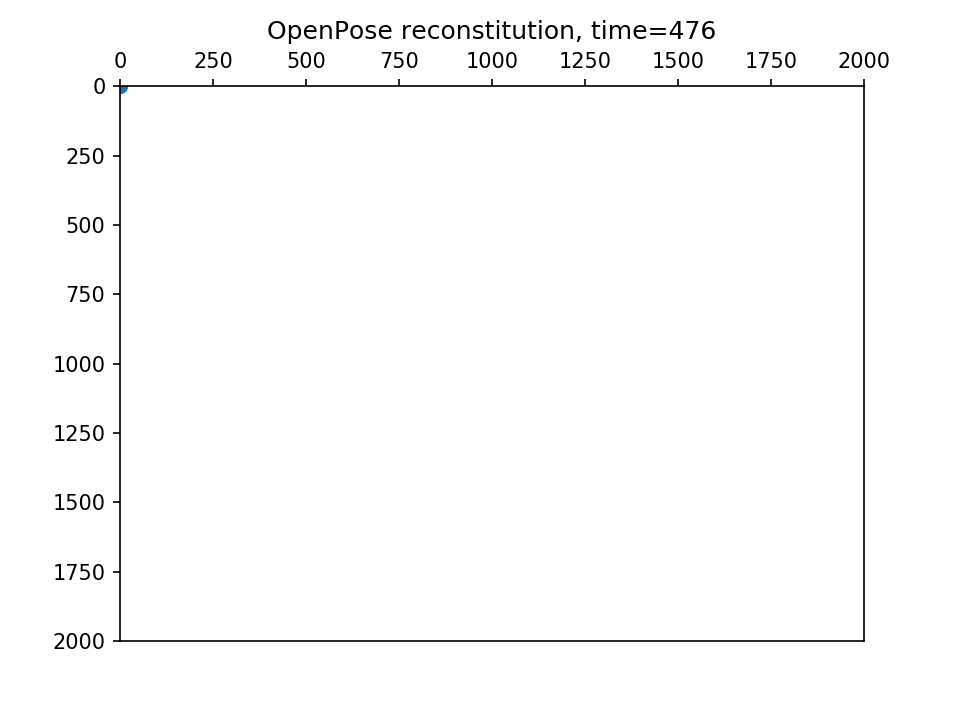

In [46]:
import matplotlib
matplotlib.rcParams['animation.ffmpeg_path'] = r'ffmpeg.exe'
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use("Agg")
import matplotlib.animation as animation
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

segments=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]
def update_graph(num):
    X,Y=[],[]
    for seg in segments:
        data=op_data_without_c[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph.set_data(X, Y)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('OpenPose reconstitution')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y=[],[]
num=200
for seg in segments:
    data=op_data_without_c[seg].iloc[num]
    X.append(data.x)
    Y.append(data.y)
graph, = ax.plot(X, Y, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=40, blit=True, repeat=False) #save_count=len(op_data2) if you want to save the animation

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)

#origine en haut à gauche de l'écran
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 


## if you want to save the animation : 
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('videos/OpenPose_animation.mp4', writer=writer)
plt.show()
